In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=[12,10]

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
#Grouping the dataset based on area_type and finding count of each area_type and then descending sorting those groups
df.groupby('area_type')['area_type'].count().sort_values(ascending=False)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

##### We will assume factors like area_type, availability, balcony, availability do not affect pricing

In [6]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [7]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
# give the number of fields with null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
# number of rows reduces on dropping null columns"
df2.shape

(13246, 5)

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

##### size is either in n BHK or n Bedrooms, we want in simple float values for easier processing

In [12]:
def give_bhk(x):
    '''It will take the size(string) as parameter and return a float of number of bedrooms'''
    return float(x.split(' ')[0])


In [13]:
give_bhk('2 BHK')

2.0

In [14]:
give_bhk('3 Bedrooms')

3.0

In [15]:
df2['bhk'] = df2['size'].apply(give_bhk)
df2.head()

C:\Users\Ardhendu Sur\AppData\Local\Temp\ipykernel_15708\1161371904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(give_bhk)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [16]:
df2['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

##### If the bhk is too big it is either a very big place or a glitch

In [17]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27.0
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0


##### 8000 sq. ft. with 27 bhk is reasonable
##### 2400 bhk with 43 bhk is quite not possible

In [18]:
#outlier removal (#1)
df2 = df2.drop(df2[df2['bhk'] == 43.0].index)

In [19]:
#After dropping the row with incorrect (glitched data)
df2.shape

(13245, 6)

In [20]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

##### other than float values ranges and other types of values are there

In [21]:
def isfloat(x):
    '''returns True is x is float'''
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df2[~df2['total_sqft'].apply(isfloat)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9.0
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2.0
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4.0


In [23]:
def sqft_to_num(x):
    try:
        return float(x)
    except:
        tokens = x.split('-')
        if len(tokens)==2:
            return (float(tokens[0]) + float(tokens[1]))/2
        return None

In [24]:
print(sqft_to_num('2100 - 2850'))
print(sqft_to_num('1000'))
print(sqft_to_num('2000Sq.Meter'))

2475.0
1000.0
None


In [25]:
#Deep copy
df3 = df2.copy()
df3['total_sqft'] = df2['total_sqft'].apply(sqft_to_num)
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0


In [26]:
#let's check an example
df3.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                 4.0
Name: 30, dtype: object

In [27]:
df3.shape

(13245, 6)

In [28]:
def modify_location(x):
    x=str(x)
    x = x.lower()
    x=x.strip()
    return x

In [29]:
modify_location(' Test ')

'test'

In [30]:
df3['location'] = df['location'].apply(modify_location)

In [31]:
#Grouping and Sorting all different types of locations  
loc_stats = df3.groupby('location')['location'].count().sort_values(ascending=False)
loc_stats

location
whitefield               535
sarjapur  road           392
electronic city          304
kanakpura road           266
thanisandra              236
                        ... 
kamanahalli main road      1
kamdhenu nagar             1
1 giri nagar               1
kanakadasa layout          1
zuzuvadi                   1
Name: location, Length: 1282, dtype: int64

In [32]:
len(df3['location'].unique())

1282

##### There are 1282 different types of location...large for dataset having about 12000 rows
##### Further lot of locations have only 1-2 rows only
##### This causes high dimensionality problem or dimensionality curse

In [33]:
len(loc_stats[loc_stats<=10])

1041

In [34]:
other_cat = loc_stats[loc_stats<=10]
other_cat

location
nagappa reddy layout     10
sadashiva nagar          10
dodsworth layout         10
1st block koramangala    10
basapura                 10
                         ..
kamanahalli main road     1
kamdhenu nagar            1
1 giri nagar              1
kanakadasa layout         1
zuzuvadi                  1
Name: location, Length: 1041, dtype: int64

##### Now we can put all locations where number of rows<=10 in other category

In [35]:
df4 = df3.copy()
df4['location'] = df4['location'].apply(lambda x: 'other' if x in other_cat else x)

In [36]:
df4.groupby('location')['location'].count().sort_values(ascending=False)

location
other                 2881
whitefield             535
sarjapur  road         392
electronic city        304
kanakpura road         266
                      ... 
banjara layout          11
tindlu                  11
kodigehalli             11
hal 2nd stage           11
pattandur agrahara      11
Name: location, Length: 242, dtype: int64

In [37]:
len(df4['location'].unique())

242

#### Feature Engineering: Adding a new column of price_per_sqft

In [38]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,old airport road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,rajaji nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


#### Outlier Removal
In statistics, an outlier is a data point that differs significantly from other observations <br>
It may be an error or just an extreme variation of data which is good to be removed <br>
We have done one before (43 bhk)

##### 1. Let's see bhk vs area

In [39]:
#if we consider that 1000sq.ft home has max. of 5 bedrooms, like 200sq.ft is the threshold
#let's be more extreme, thresold = 150
df4.shape

(13245, 7)

In [40]:
df4[df4['total_sqft']/df4['bhk']<150]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
45,hsr layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
89,rajaji nagar,6 Bedroom,710.0,6.0,160.0,6.0,22535.211268
119,hennur road,2 Bedroom,276.0,3.0,23.0,2.0,8333.333333
129,vishwapriya layout,7 Bedroom,950.0,7.0,115.0,7.0,12105.263158
176,kumaraswami layout,5 Bedroom,600.0,3.0,85.0,5.0,14166.666667
...,...,...,...,...,...,...,...
12942,other,6 Bedroom,625.0,3.0,78.0,6.0,12480.000000
13023,hegde nagar,6 Bedroom,760.0,6.0,98.0,6.0,12894.736842
13045,other,6 Bedroom,600.0,6.0,65.0,6.0,10833.333333
13112,nagavara,3 Bedroom,440.0,3.0,35.0,3.0,7954.545455


In [41]:
#maybe some of them are true, but they are extreme examples which should be avoided 
df5 = df4[df4['total_sqft']/df4['bhk']>150]
df5.shape

(12974, 7)

##### 2. Price per sqaure feet

In [42]:
df5['price_per_sqft'].describe()

count     12974.000000
mean       6553.925861
std        4394.296022
min         267.829813
25%        4250.000000
50%        5390.625000
75%        7152.535169
max      176470.588235
Name: price_per_sqft, dtype: float64

##### 267 per sq.ft. is extremely rare and 176470 per sq.ft. may occur in prime places, but both are extreme cases and better to ignore

##### Around 68% data lies within 1 S.D. and 95% around 2 S.D. and about 99.7 around 3 S.D. 

In [43]:
def outlier_ppsf_remover(df_):
    '''It will remove the outlier points according to location.
    It will first group according to location and then remove the outlier'''
    df_out = pd.DataFrame()
    for key, chunkdf in df_.groupby('location'):
        m = np.mean(chunkdf['price_per_sqft'])
        sd = np.std(chunkdf['price_per_sqft'])
        df_temp = chunkdf[~((chunkdf['price_per_sqft']>(m+sd)) | (chunkdf['price_per_sqft']<(m-sd)))]
        df_out = pd.concat([df_out,df_temp],ignore_index=True)
    return df_out
        

In [44]:
df6 = outlier_ppsf_remover(df5)
df6.shape

(10752, 7)

More than 2000 outliers removed from dataset

In [45]:
def scatter(df_,location):
    '''
    It will take a dataframe and a location as input
    It will plot a scatter plot of 1 bhk, 2bhk and 3bhk flats (total_sqft vs price)
    It can help us read data and find anomalies
    '''
    bhk1 = df_[(df_['location']==location) & (df_['bhk']==1)]
    bhk2 = df_[(df_['location']==location) & (df_['bhk']==2)]
    bhk3 = df_[(df_['location']==location) & (df_['bhk']==3)]
    plt.scatter(bhk1['total_sqft'],bhk1['price'],color='red',label='1 BHK',marker='^')
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK',marker='o')
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='green',label='3 BHK',marker='x')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

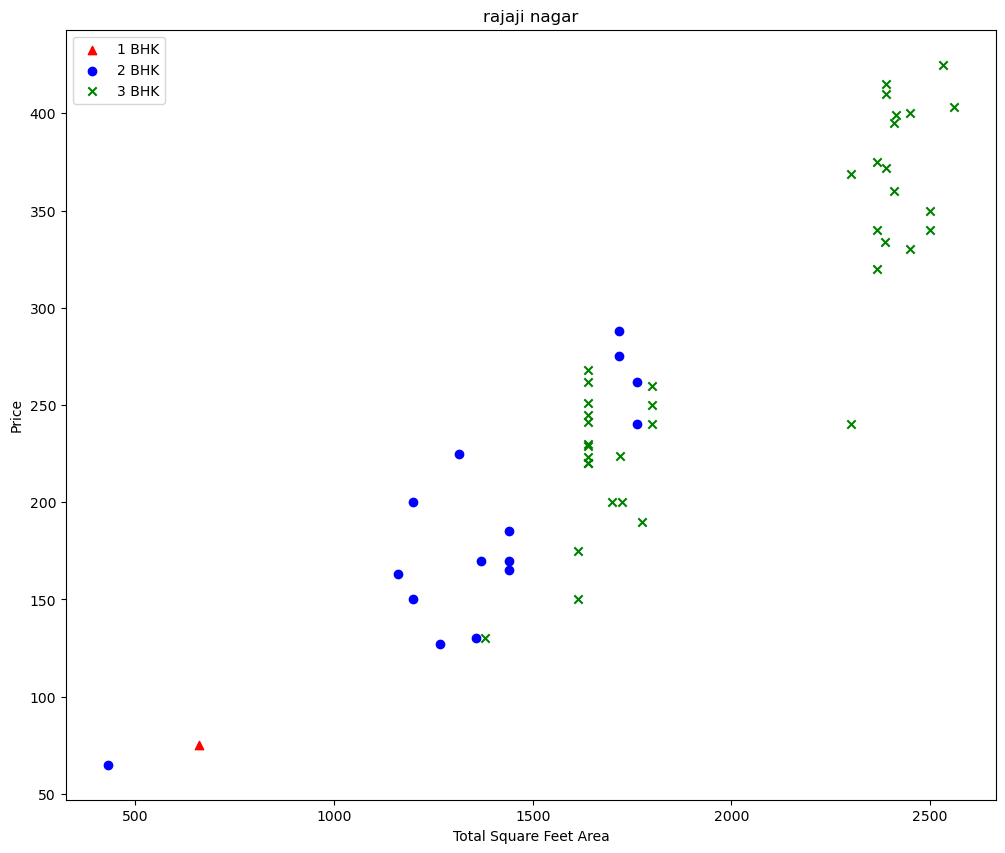

In [46]:
#eg place: rajaji nagar
scatter(df6,'rajaji nagar')

There are some abnormal points - from 1500 to 2000 sqft. there are some places where 2bhk is more costly than 3 bhks for the same area of same location  - may be due to some factors but removing then will normalize our dataset"
<br>
We should remove properties of same location, where the price of 2bhk is more than 3 bhk for the same sqft

##### We can remove those 2 BHK appartments whose price_per_sqft is less then mean price_per_sqft of 1 BHK appartment

In [47]:
def remove_bhk_outlier(df_):
    '''
    This function removes all 2 BHK appartments whose price_per_sqft is less then mean price_per_sqft of 1 BHK appartment,
    all 3 BHK appartments whose price_per_sqft is less than mean of 2 BHK,.. and so on
    In short, it removes all points that seems to be anomaly
    '''
    exclusions = np.array([])
    #array of exclusion indexes (anomaly points) which needs to be dropped
    for location, location_df in df_.groupby('location'):
        #first grouping by location
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            #nested loop to further group by 'bhk'
            #dictionary within dictionary
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)       #dict
            # 1 bhk less appartment, for removing 2bhk outliers we need stats of 1 bhk appartments
            if stats and stats['count']>5:
                exclusions = np.append(exclusions, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df_.drop(exclusions,axis='index')


In [48]:
df7 = remove_bhk_outlier(df6)

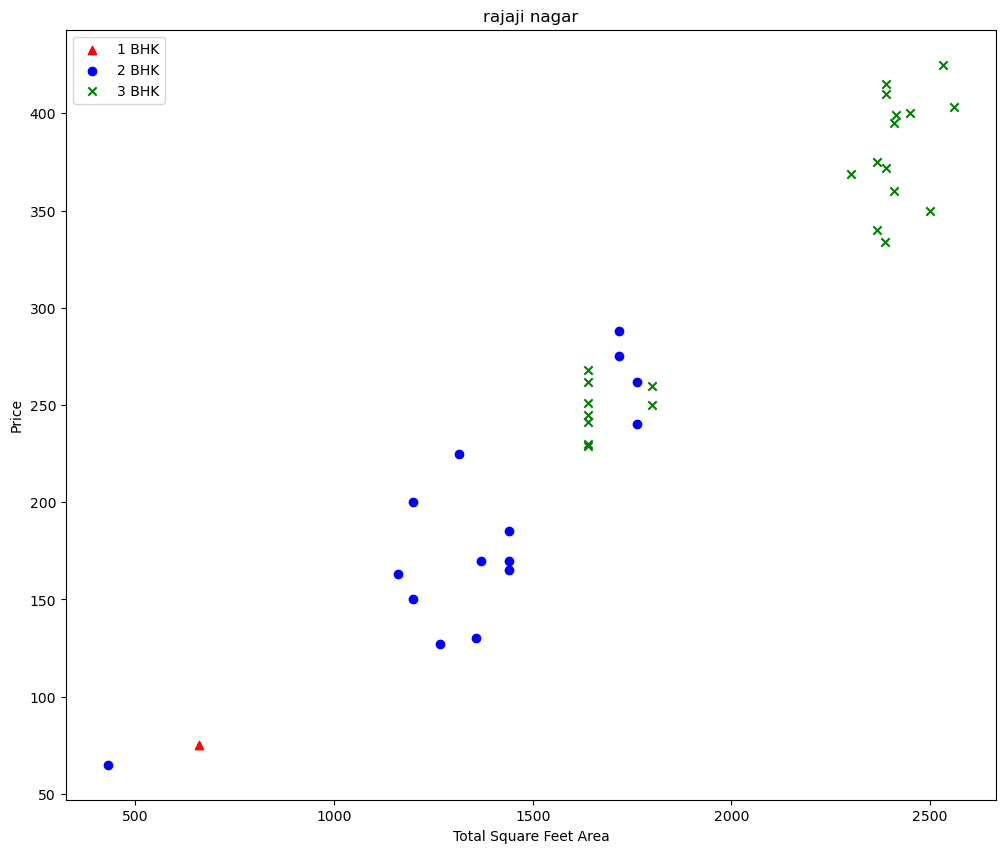

In [49]:
scatter(df7,'rajaji nagar')

Anomaly 3BHK appartments removed

In [50]:
df7.shape

(7694, 7)

Text(0, 0.5, 'Count')

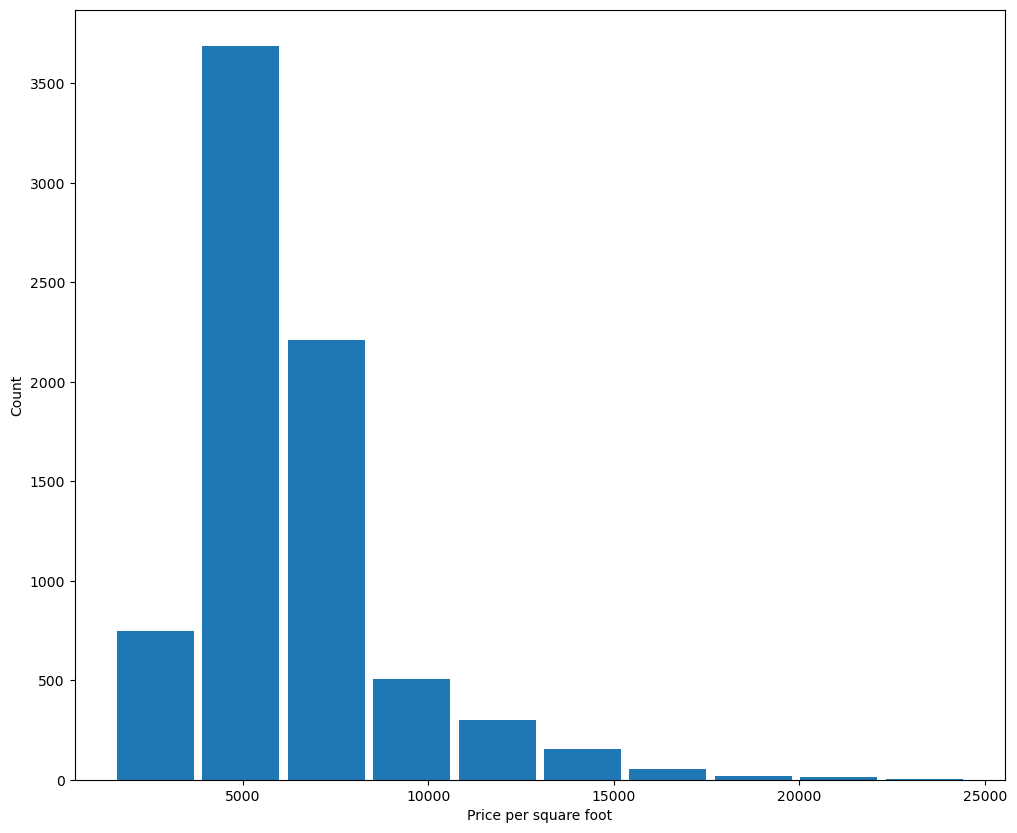

In [51]:
#histogram to visualize the dataset
plt.hist(df7['price_per_sqft'],rwidth=0.9)
#rwidth refers to the width of the rectangle (0.9 to ensure spacing)
plt.xlabel('Price per square foot')
plt.ylabel('Count')

#### Normal distribution of data - similar to a bell curve 

##### 3. Bathrooms

In [52]:
df7['bath'].unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 12., 27., 10., 16.,
       13.])

In [53]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5514,neeladri nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
5959,other,27 BHK,8000.0,27.0,230.0,27.0,2875.000000
6302,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
7087,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
7438,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


Text(0, 0.5, 'Count')

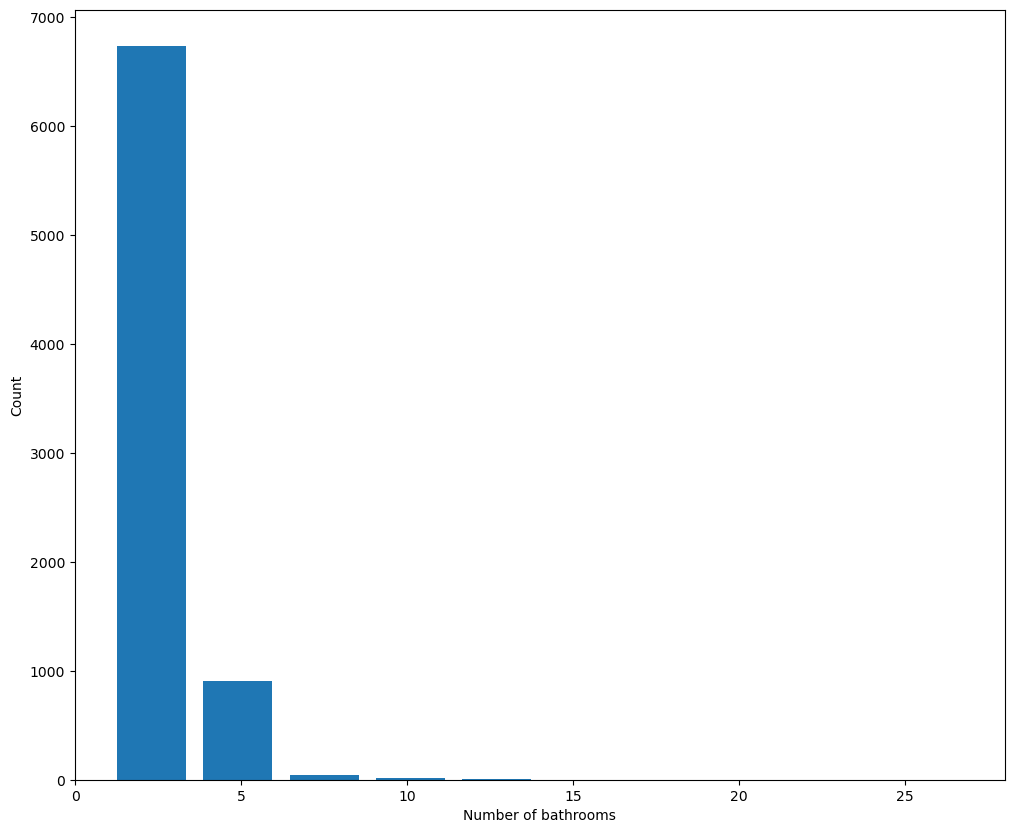

In [54]:
#histogram of number of bathrooms
plt.hist(df7['bath'],rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [55]:
#Let's remove outlier exammples where number of bathrooms > number opf bedrooms + 2
len(df7[df7['bath']>df7['bhk']+2])

6

In [56]:
df8 = df7[df7['bath']<=df7['bhk']+2]
df8.shape

(7688, 7)

In [57]:
df8.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st block jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st block jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,1st block jayanagar,6 BHK,1200.0,6.0,125.0,6.0,10416.666667
3,1st block jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
4,1st block jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333


In [58]:
#dropping unecessary columns from dataframe before training the model
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(5)

,location,total_sqft,bath,price,bhk
0,1st block jayanagar,2850.0,4.0,428.0,4.0
1,1st block jayanagar,1630.0,3.0,194.0,3.0
2,1st block jayanagar,1200.0,6.0,125.0,6.0
3,1st block jayanagar,1875.0,2.0,235.0,3.0
4,1st block jayanagar,1200.0,2.0,130.0,3.0


### Building the Linear Regression Model

'location' is a column with text value so it cannot be directly processed with the model.<br>
To convert text into numerical info we can use <b>One Hot Encoding<b/>

In [59]:
one_hot_encoded_data = pd.get_dummies(df9, columns = ['location'],dtype='int16')
one_hot_encoded_data.head()

,total_sqft,bath,price,bhk,location_1st block jayanagar,location_1st phase jp nagar,location_2nd phase judicial layout,location_2nd stage nagarbhavi,location_5th block hbr layout,location_5th phase jp nagar,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In series of column created in one-hot-encoding one column always has 1 <br>
We can reduce one column from the dataframe (previous: 1 0 0 0 new: 0 0 0) - if we drop the first column <br>
Hence dropping the 'other' column in dataframe

In [60]:
df10 = one_hot_encoded_data.drop('location_other',axis='columns')
df10.head()

,total_sqft,bath,price,bhk,location_1st block jayanagar,location_1st phase jp nagar,location_2nd phase judicial layout,location_2nd stage nagarbhavi,location_5th block hbr layout,location_5th phase jp nagar,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df10.shape

(7688, 245)

In [62]:
#Independent variable: X
X = df10.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,location_1st block jayanagar,location_1st phase jp nagar,location_2nd phase judicial layout,location_2nd stage nagarbhavi,location_5th block hbr layout,location_5th phase jp nagar,location_6th phase jp nagar,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#Dependent variable: Y
Y = df10['price']
Y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4    130.0
Name: price, dtype: float64

#### Applying LinearRegression after train_test_split

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
#20% data for testing and rest 80% data for fitting
#random_state controls random shuffling and splitting of data - it will help to retain the way data is split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=10)

In [66]:
lrgr = LinearRegression()
lrgr.fit(X_train,Y_train)
score = lrgr.score(X_test,Y_test)

In [67]:
score*100

87.8947023560827

#### K-fold cross validation test                                             

In [68]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.87894702, 0.80682666, 0.88633182, 0.81065538, 0.83689434])

In [69]:
cross_val_score(Lasso(),X,Y,cv=cv)

NameError: name 'Lasso' is not defined

In [70]:
cross_val_score(DecisionTreeRegressor(),X,Y,cv=cv)

NameError: name 'DecisionTreeRegressor' is not defined

Linear Regression seems to be the best model for prediction in our dataset

#### Prediction

In [71]:
locat = "location_1st block jayanagar"
loc_index=np.where(X.columns==locat)
loc_index

(array([3], dtype=int64),)

In [72]:
def predict_price(location,sqft,bath,bhk):
    location = location.lower()
    location = 'location_'+location
    location=location.strip()
    loc_index = np.where(X.columns==location)

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if len(loc_index[0]) and loc_index[0][0] > 0:
        x[loc_index] = 1

    return lrgr.predict([x])

In [73]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Ardhendu Sur\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88.33479454])

In [74]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Ardhendu Sur\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([89.87578078])

In [75]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Ardhendu Sur\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.71297333])

In [76]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Ardhendu Sur\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([175.25395957])

In [77]:
predict_price('Whitefield',1500, 3, 4)

C:\Users\Ardhendu Sur\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93.70559988])

#### Uploading the model

In [78]:
import pickle
with open('bangalore_house_price_model.pickle','wb') as f:
    pickle.dump(lrgr,f)

#### Uploading Columns

In [79]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("model_columns.json","w") as f:
    f.write(json.dumps(columns))